In [43]:
import pandas as pd
import re
import string

In [44]:
def word_process(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

def convert(data):
    data['sentiment'] = data['sentiment'].replace({'positive': 2, 'negative': 0, 'neutral': 1})
    data['Age of User'] = data['Age of User'].replace({'0-20':18,'21-30':25,'31-45':38,'46-60':53,'60-70':65,'70-100':80})
    return data

def preprocess_data(data_path):
    data = pd.read_csv(data_path, encoding='ISO-8859-1')
    data = data[['text', 'sentiment', 'Age of User']]
    data['text'] = data['text'].astype(str)
    data = data.dropna()
    data = data.drop_duplicates()
    data['text'] = data['text'].apply(word_process)
    data = convert(data)
    return data



In [52]:
train_data = preprocess_data('data/train.csv')
train_data.to_csv('data/processed_train.csv', index=False)
test_data = preprocess_data('data/test.csv')
test_data.to_csv('data/processed_test.csv', index=False)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16880\1805579974.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace({'positive': 2, 'negative': 0, 'neutral': 1})
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16880\1805579974.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Age of User'] = data['Age of User'].replace({'0-20':18,'21-30':25,'31-45':38,'46-60':53,'60-70':65,'70-100':80})
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16880\1805579974.py:13: FutureWarning: Downcasting be

In [48]:
train_data

,text,sentiment,Age of User
0,i d have responded if i were going,1,18
1,sooo sad i will miss you here in san diego,0,25
2,my boss is bullying me,0,38
3,what interview leave me alone,0,53
4,sons of why couldn t they put them on t...,0,65
...,...,...,...
27476,wish we could come see u on denver husband l...,0,38
27477,i ve wondered about rake to the client has ...,0,53
27478,yay good for both of you enjoy the break y...,2,65
27479,but it was worth it,2,80


<Axes: title={'center': 'Sentiment distribution in train data'}, xlabel='sentiment'>

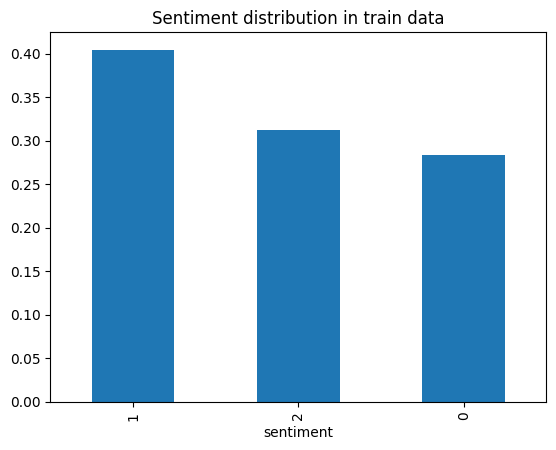

In [ ]:
train_data['sentiment'].value_counts(normalize=True).plot(kind='bar', title='Sentiment distribution in train data')